<a href="https://colab.research.google.com/github/keijoss/thesis_backend/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Using scikit - random forest to handle 3 quizzes so student can have reco even without answering other quizzes.

# To adjust na per quiz only, modify the dataset only (questions)

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.DataFrame([
    {"Quiz ID": "Quiz 1", "Question ID": "M1", "Question": "What is the primary function of the prostate gland?",
     "Options": "a. Store urine, b. Produce seminal fluid, c. Protect the kidneys, d. Regulate hormones",
     "Correct Answer": "b", "Topic": "Prostate Gland"},
    {"Quiz ID": "Quiz 1", "Question ID": "M2", "Question": "Which part of the male reproductive system is responsible for carrying urine and semen out?",
     "Options": "a. Bladder, b. Urethra, c. Penis, d. Prostate gland",
     "Correct Answer": "b", "Topic": "Urethra"},
    {"Quiz ID": "Quiz 1", "Question ID": "M3", "Question": "What is the role of the spermatic cord?",
     "Options": "a. To transport sperm and blood to the testes, b. To produce testosterone, c. To store urine, d. To filter blood",
     "Correct Answer": "a", "Topic": "Spermatic Cord"},
    {"Quiz ID": "Quiz 1", "Question ID": "M4", "Question": "What is the function of the testes?",
     "Options": "a. To produce and store sperm, b. To regulate blood flow, c. To store urine, d. To produce seminal fluid",
     "Correct Answer": "a", "Topic": "Testes"},
    {"Quiz ID": "Quiz 1", "Question ID": "M5", "Question": "Which organ is responsible for producing testosterone in males?",
     "Options": "a. Prostate gland, b. Testes, c. Kidney, d. Bladder",
     "Correct Answer": "b", "Topic": "Testes"},
    {"Quiz ID": "Quiz 1", "Question ID": "M6", "Question": "What is the primary function of the bladder?",
     "Options": "a. To produce sperm, b. To store urine, c. To produce seminal fluid, d. To transport sperm",
     "Correct Answer": "b", "Topic": "Bladder"},
    {"Quiz ID": "Quiz 1", "Question ID": "M7", "Question": "What is the function of the penis in the male reproductive system?",
     "Options": "a. To produce sperm, b. To deliver sperm into the female reproductive system, c. To regulate hormone production, d. To filter blood",
     "Correct Answer": "b", "Topic": "Penis"},
    {"Quiz ID": "Quiz 1", "Question ID": "M8", "Question": "What are the tiny tubes in the testes where sperm production occurs called?",
     "Options": "a. Urethra, b. Seminiferous tubules, c. Vas deferens, d. Epididymis",
     "Correct Answer": "b", "Topic": "Testes"},
    {"Quiz ID": "Quiz 1", "Question ID": "M9", "Question": "Where is sperm stored before ejaculation?",
     "Options": "a. Prostate gland, b. Vas deferens, c. Epididymis, d. Urethra",
     "Correct Answer": "c", "Topic": "Epididymis"},
    {"Quiz ID": "Quiz 1", "Question ID": "M10", "Question": "Which part of the male reproductive system transports sperm from the testes to the urethra?",
     "Options": "a. Vas deferens, b. Prostate gland, c. Seminiferous tubules, d. Bladder",
     "Correct Answer": "a", "Topic": "Vas Deferens"}

])

# Student answers example
student_answers = [
    {"Question ID": "M1", "Answer": "b"},
    {"Question ID": "M2", "Answer": "c"}, #wrong
    {"Question ID": "M3", "Answer": "a"},
    {"Question ID": "M4", "Answer": "a"},
    {"Question ID": "M5", "Answer": "b"},
    {"Question ID": "M6", "Answer": "b"},
    {"Question ID": "M7", "Answer": "b"},
    {"Question ID": "M8", "Answer": "b"},
    {"Question ID": "M9", "Answer": "c"},
    {"Question ID": "M10", "Answer": "a"}

    # Add all answers here
]

# Train model using quiz data

# Add 'User Answer' and 'Is Correct' columns
answers_df = pd.DataFrame(student_answers)
data = data.merge(answers_df, on="Question ID", how="left")
data["Is Correct"] = (data["Answer"] == data["Correct Answer"]).astype(int)

# Prepare data for training
X = pd.get_dummies(data[["Quiz ID", "Topic", "Answer"]])
y = data["Is Correct"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions
data["Predicted"] = model.predict(X)

# Calculate performance per topic
performance = data.groupby("Topic")["Is Correct"].mean().reset_index()
performance.columns = ["Topic", "Accuracy"]

# Suggest topics for review and ignore every topic that has 0 accuracy

threshold = 0.7  # Accuracy threshold
to_review = performance[performance["Accuracy"] < threshold]

# # Set threshold
# threshold = 0.7  # Accuracy threshold

# # Filter out topics with 0 accuracy
# filtered_performance = performance[performance["Accuracy"] > 0]

# # Suggest topics for review
# to_review = filtered_performance[filtered_performance["Accuracy"] < threshold]

# Display recommendations
print("Topics to Review:")
print(to_review)

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Topics to Review:
     Topic  Accuracy
6  Urethra       0.0
Model Accuracy: 90.00%


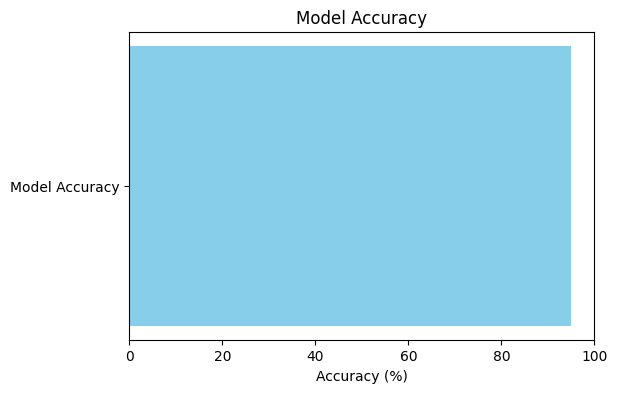

In [ ]:
import matplotlib.pyplot as plt

# Model accuracy
accuracy = (data["Predicted"] == data["Is Correct"]).mean()
accuracy_percentage = accuracy * 100

# Plotting the accuracy
plt.figure(figsize=(6, 4))
plt.barh(['Model Accuracy'], [accuracy_percentage], color='skyblue')
plt.xlim(0, 100)  # Set x-axis range from 0 to 100
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.show()

<ipython-input-24-a8418bfed02c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())


Model Accuracy: 95.00%


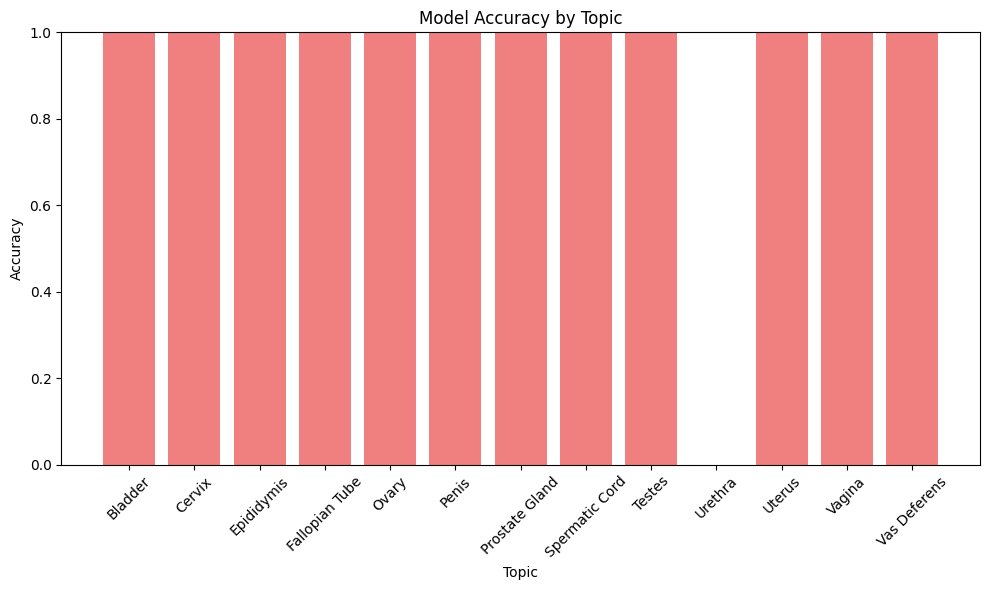

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is the correct DataFrame containing your predictions and correct labels
# Calculate accuracy per topic
topic_accuracy = data.groupby('Topic').apply(lambda x: (x['Predicted'] == x['Is Correct']).mean())

# Print the overall model accuracy
accuracy = (data['Predicted'] == data['Is Correct']).mean()
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize accuracy by topic
plt.figure(figsize=(10, 6))
plt.bar(topic_accuracy.index, topic_accuracy.values, color='lightcoral')

plt.xlabel('Topic')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Topic')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Will be the filename of the trained model
filename = 'male_quiz_ai.pkl'

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(data, file)

print(f"Model saved as {filename}")


Model saved as male_quiz_ai.pkl


In [ ]:
from google.colab import files

# Download the model file
files.download('male_quiz_ai.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>